In [92]:
import pandas as pd

import numpy as np

import pylab as plt
import seaborn as sns
%matplotlib inline  

import statistics

In [2]:
pd.set_option('display.max_columns', None)  # es para enseñar todas las columnas del df

import warnings
warnings.simplefilter('ignore')

In [61]:
shark=pd.read_csv('../data/attacks.csv',encoding="latin1")

In [62]:
shark.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [63]:
shark.columns.shape #tenemos 24 columnas

(24,)

In [64]:
shark.info(memory_usage="deep") # 25723 filas >> todas tienen nulos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

El case number es un identificador, por lo que vamos a rellenar los nan con números random distintos a los identificadores ya existentes, de manera que todos los ataques estén identificados

In [65]:
nan_cols=shark.isna().sum()
nan_cols[nan_cols>0]

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [66]:
def check_nan(df):
    
    nan_cols=shark.isna().mean() * 100
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))

    sns.heatmap(df.isna(),  # mapa de calor
                yticklabels=False,
                cmap='viridis',
                cbar=False)
    
    plt.show();

'N nan cols: 24'

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

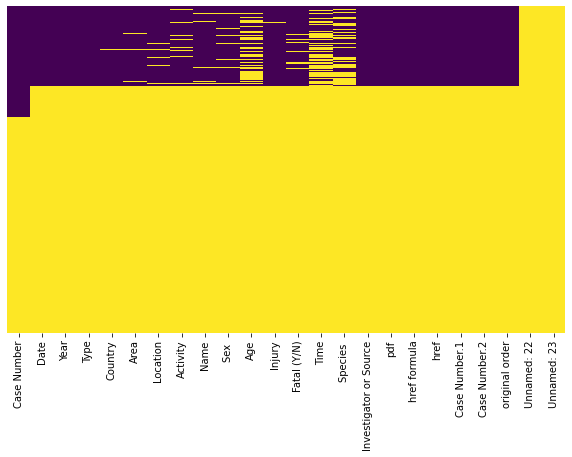

In [67]:
check_nan(shark)

In [68]:
nan_rows=shark.index[shark.isnull().all(1)] #lista de filas en las que todos los valores son nulos
nan_rows

Int64Index([ 8702,  8703,  8704,  8705,  8706,  8707,  8708,  8709,  8710,
             8711,
            ...
            25712, 25713, 25714, 25715, 25716, 25717, 25718, 25719, 25720,
            25721],
           dtype='int64', length=17020)

In [69]:
nan_rows.shape  

(17020,)

Un 66.17% de las filas (17020/25723) tienen todos sus valores nulos 
-podemos eliminar hasta el 20% de las filas, por lo que nos quedariamos con 20,578 filas 
-hay 8703 filas con datos






Vamos a eliminar todas las columnas con nulos y duplicar valores con datos hasta obtener una dataframe con al menos 20,000 filas

In [70]:
shark.drop(nan_rows,axis=0,inplace=True)

'N nan cols: 24'

Case Number                0.011490
Date                      27.588188
Year                      27.611169
Type                      27.634149
Country                   28.162703
Area                      32.816270
Location                  33.792945
Activity                  33.838906
Name                      30.001149
Sex                       34.080202
Age                       60.117201
Injury                    27.909916
Fatal (Y/N)               33.781455
Time                      66.126623
Species                   60.197633
Investigator or Source    27.783523
pdf                       27.588188
href formula              27.599678
href                      27.588188
Case Number.1             27.588188
Case Number.2             27.588188
original order            27.507756
Unnamed: 22               99.988510
Unnamed: 23               99.977019
dtype: float64

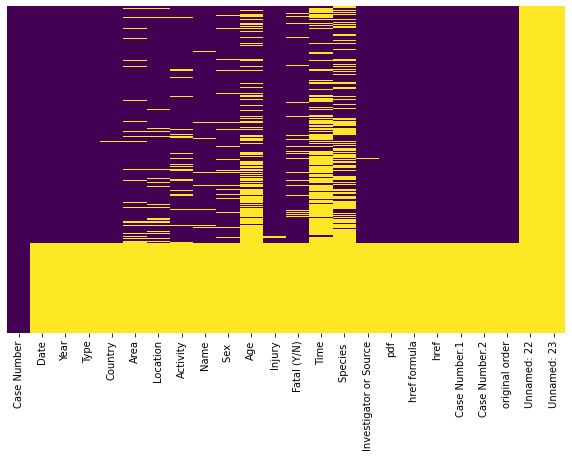

In [71]:
check_nan(shark)

Vemos que gran parte de las filas aun teniendo identificador no tienen datos relevantes, por lo que tambien los vamos a eliminar ya que no nos dan información relevante, luego decidire como añadir estos datos

In [72]:
shark.drop_duplicates(inplace=True)

In [73]:
#rellenamos las columnas unnamed 22 y unnamed 23 de 0. 

shark["Unnamed: 22"]=0
shark["Unnamed: 23"]=0

'N nan cols: 22'

Case Number                0.015845
Date                       0.142608
Year                       0.174299
Type                       0.205990
Country                    0.934876
Area                       7.352242
Location                   8.699097
Activity                   8.762478
Name                       3.470132
Sex                        9.095231
Age                       45.000792
Injury                     0.586278
Fatal (Y/N)                8.683251
Time                      53.287910
Species                   45.111710
Investigator or Source     0.411979
pdf                        0.142608
href formula               0.158453
href                       0.142608
Case Number.1              0.142608
Case Number.2              0.142608
original order             0.031691
dtype: float64

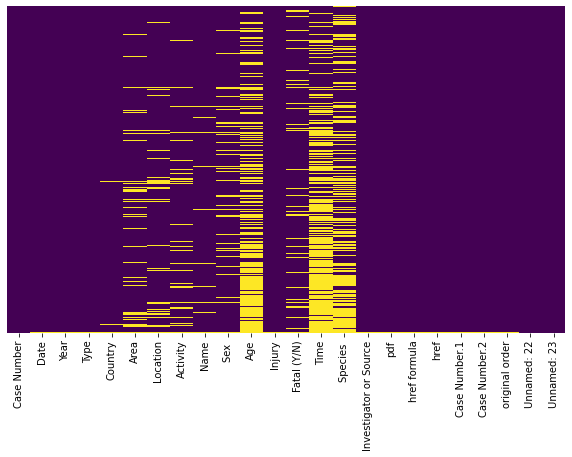

In [74]:
check_nan(shark)

Ahora ya tenemos datos con los que poder trabajar, vamos a centrarnos primero en las columnas con más nulos

# Columna "time" y columna "Species"

In [75]:
shark.Time.head(30)


0              18h00
1      14h00  -15h00
2              07h45
3                NaN
4                NaN
5                NaN
6     Late afternoon
7                NaN
8              17h00
9              14h00
10           Morning
11               NaN
12             15h00
13             08h15
14               NaN
15             11h00
16             10h30
17               NaN
18             10h40
19             16h50
20             07h00
21             09h30
22         Afternoon
23             21h50
24             09h40
25               NaN
26               NaN
27               NaN
28               NaN
29             08h00
Name: Time, dtype: object

Hay mucha variedad de datos en esta columna, por un lado tenemos horas, por otro lado tenemos mañana/tarde y para algunos tenemos nulos. Vamos a simplificar esta columna en "mañana", "tarde", "unknown"

In [76]:
#primero rellenamos los Nan con unkown
shark.Time.fillna("unkown",inplace=True)

In [77]:
shark.Time.head(30)

0              18h00
1      14h00  -15h00
2              07h45
3             unkown
4             unkown
5             unkown
6     Late afternoon
7             unkown
8              17h00
9              14h00
10           Morning
11            unkown
12             15h00
13             08h15
14            unkown
15             11h00
16             10h30
17            unkown
18             10h40
19             16h50
20             07h00
21             09h30
22         Afternoon
23             21h50
24             09h40
25            unkown
26            unkown
27            unkown
28            unkown
29             08h00
Name: Time, dtype: object

In [78]:
afternoon=["13","14","15","16","17","18"]

In [79]:
aftern={"17":"Afternoon ","18":"After"}

# VOLVER LUEGO A LIMPIAR "TIME"

In [80]:
shark.Time=shark.Time.str.replace("18","Afternoon ")

# VOLVER LUEGO A rellenar y LIMPIAR "Species"

# Columnas "Age","Sex","Activity" y "Location"

In [81]:
shark.Age

0         57
1         11
2         48
3        NaN
4        NaN
        ... 
6306     NaN
6307     NaN
6308     NaN
6309     NaN
25722    NaN
Name: Age, Length: 6311, dtype: object

Rellenamos los nulos de la columna age con la media de edad de los datos que tenemos ya que nos conviene mantener en la columna todo valores numéricos en lugar de añadir alguna categoría como "unknown".

Primero cambiamos el tipo de dato de "Age" de objeto a int

In [82]:
shark["Age"]=shark.Age.str.extract(r'(\d\d)') #hay valores que tienen letras, por lo que cogemos solo los valores numéricos

In [83]:
shark.Age

0         57
1         11
2         48
3        NaN
4        NaN
        ... 
6306     NaN
6307     NaN
6308     NaN
6309     NaN
25722    NaN
Name: Age, Length: 6311, dtype: object

In [87]:
shark.Age.fillna(0,inplace=True)

In [102]:
shark.Age=shark.Age.astype(dtype="int8")

In [107]:
shark.Age.replace(0, shark.Age.mean(),inplace=True)